In [2]:
import os
import pandas as pd
import tensorflow
import numpy as np

**original_train_data : train_csv**

**일반대화 데이타 : conversation_normal.csv**

In [4]:
orig_train_path ="./data/raw_csv/train.csv"
orig_train = pd.read_csv(orig_train_path)
orig_train.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [5]:
class_counts = orig_train['class'].value_counts()

print(class_counts)

orig_train.shape

기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64


(3950, 3)

In [6]:
orig_train[orig_train['class']=='협박 대화'][:3]

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
12,12,협박 대화,네네 무슨 일 때문에 전화주셨나요?\n우리 애가 지우개 하나 훔친거 가지고 애들 앞...


In [7]:
orig_train[orig_train['class']=='갈취 대화'][:3]

,idx,class,conversation
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...
9,9,갈취 대화,자네 세금계산서 보내준 거 메일이랑 수치가 다르던데?\n그게.\n얼마나 해먹었어? ...


In [8]:
orig_train[orig_train['class']=='직장 내 괴롭힘 대화'][:3]

,idx,class,conversation
5,5,직장 내 괴롭힘 대화,나 이틀뒤에 가나다 음식점 예약좀 해줘. 저녁7시로.\n가나다 음식점이요.?\n응....
11,11,직장 내 괴롭힘 대화,이대리 오늘 도대체 뭘한거야?\n창고정리도 하고 바닥도 청소했습니다\n이게 한거니?...
14,14,직장 내 괴롭힘 대화,김사원\n대리님 왜 그러세요?\n이거 오늘까지 제출해야 하는데 좀 해줄래?\n네? ...


In [9]:
orig_train[orig_train['class']=='기타 괴롭힘 대화'][:3]

,idx,class,conversation
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
6,6,기타 괴롭힘 대화,35번 손님 아이스커피 두잔나왔습니다\n아이스커피? \n네 맛있게드세요\n저기요 아...
7,7,기타 괴롭힘 대화,경비아저씨 내차에 경고장 붙였어요?\n내가 여기 몇년째 사는데 아직도 내차인줄 모르...


In [10]:
# 일반 대화
normal_data_path ="./data/raw_csv/conversation_normal.csv"
normal_data = pd.read_csv(normal_data_path)
normal_data.head()

,idx,class,conversation
0,4001,일반 대화,"집에서 자주 만드는 음식 있어?\n응, 김치찌개 자주 만들어.\n오, 김치찌개! 어..."
1,4002,일반 대화,"너는 어떤 장르 좋아해?\n나는 록 음악을 좋아해.\n오, 록! 그럼 Queen 좋..."
2,4003,일반 대화,"오늘 점심 뭐 먹을까요?\n저는 김밥 먹고 싶은데, 다른 사람들은 어떻게 생각해요?..."
3,4004,일반 대화,과제 다 했어?\n아직이야. 너무 많아.\n나도 겨우 끝냈어.\n우리 같이 도서관 갈래?
4,4005,일반 대화,"이 장난감은 여러 가지 색상 중에서 선택할 수 있나요?\n네, 다양한 색상이 있어서..."


In [11]:
print(len(normal_data))

1164


In [12]:
train_data = pd.concat([orig_train, normal_data], ignore_index=True)


In [13]:
class_counts = train_data['class'].value_counts()

print(class_counts)

일반 대화          1164
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: class, dtype: int64


In [14]:
train_data[train_data['class']=='일반 대화'][:3]

,idx,class,conversation
3950,4001,일반 대화,"집에서 자주 만드는 음식 있어?\n응, 김치찌개 자주 만들어.\n오, 김치찌개! 어..."
3951,4002,일반 대화,"너는 어떤 장르 좋아해?\n나는 록 음악을 좋아해.\n오, 록! 그럼 Queen 좋..."
3952,4003,일반 대화,"오늘 점심 뭐 먹을까요?\n저는 김밥 먹고 싶은데, 다른 사람들은 어떻게 생각해요?..."


In [15]:
X_train = orig_train['conversation']
y_train = orig_train['class']

# 각 문장의 문자 수 계산
lengths = X_train.apply(len)

# 최대 길이
max_length = lengths.max()

# 평균 길이
avg_length = lengths.mean()

print(f"훈련 Max length: {max_length}")
print(f"훈련 Average length: {avg_length:.2f}")

훈련 Max length: 874
훈련 Average length: 226.57


In [16]:
X_train = normal_data['conversation']
y_train = normal_data['class']

# 각 문장의 문자 수 계산
lengths = X_train.apply(len)

# 최대 길이
max_length = lengths.max()

# 평균 길이
avg_length = lengths.mean()

print(f"일반 대화 Max length: {max_length}")
print(f"일반 대화 Average length: {avg_length:.2f}")

일반 대화 Max length: 478
일반 대화 Average length: 179.10


X_train : (5114,)
y_train : (5114,)


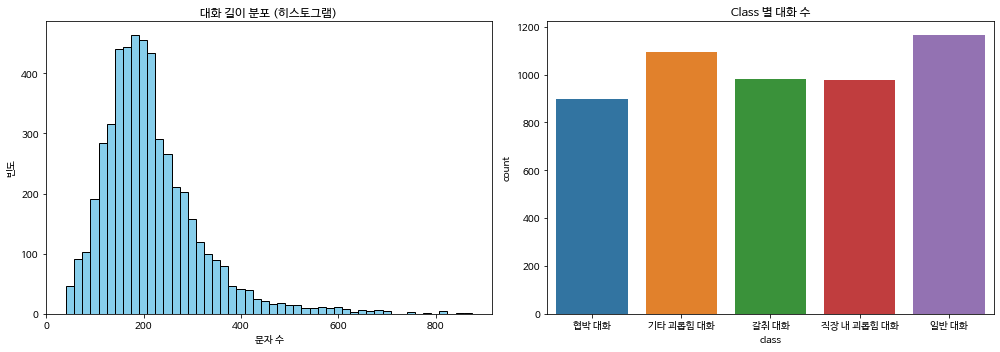

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

X_train = train_data['conversation']
y_train = train_data['class']
lengths = train_data['conversation'].apply(len)

print('X_train :',X_train.shape)
print('y_train :',y_train.shape)
#print('label 종류:', set(y_train))

# 시각화
plt.figure(figsize=(14, 5))

# 1. 히스토그램: 대화 길이
plt.subplot(1, 2, 1)
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title("대화 길이 분포 (히스토그램)")
plt.xlabel("문자 수")
plt.ylabel("빈도")

# 2. Countplot: class 분포
plt.subplot(1, 2, 2)
sns.countplot(x=y_train)
plt.title("Class 별 대화 수")

plt.tight_layout()
plt.show()

In [18]:
lengths = train_data['conversation'][train_data['class']=='협박 대화'].apply(len)
print(lengths.shape)

(896,)


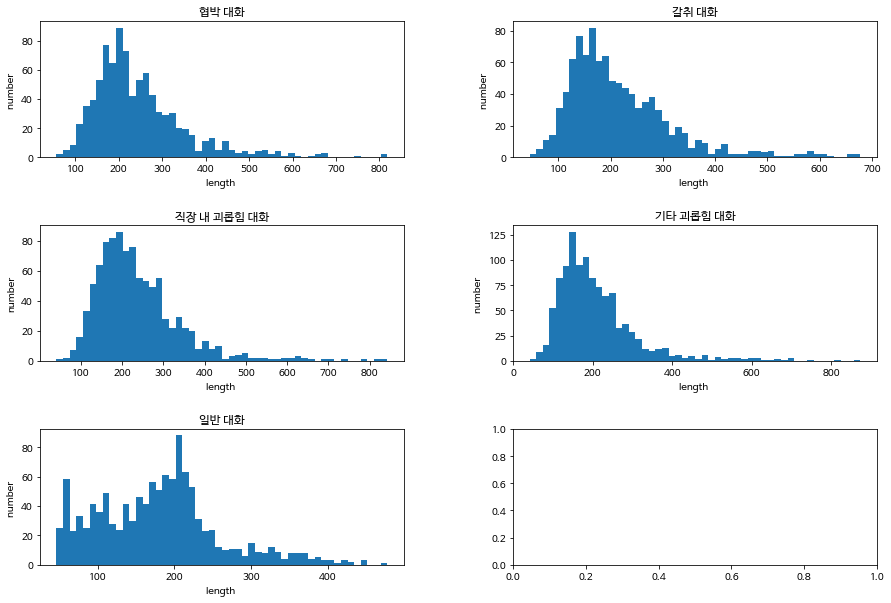

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # 2차원 → 1차원 배열로 변환

lengths1 = train_data['conversation'][train_data['class']=='협박 대화'].apply(len)
lengths2 = train_data['conversation'][train_data['class']=='갈취 대화'].apply(len)
lengths3 = train_data['conversation'][train_data['class']=='직장 내 괴롭힘 대화'].apply(len)
lengths4 = train_data['conversation'][train_data['class']=='기타 괴롭힘 대화'].apply(len)
lengths5 = train_data['conversation'][train_data['class']=='일반 대화'].apply(len)

axes[0].hist(lengths1, bins=50)
axes[0].set_xlabel('length ')
axes[0].set_ylabel('number ')
axes[0].set_title('협박 대화')

axes[1].hist(lengths2, bins=50)
axes[1].set_xlabel('length ')
axes[1].set_ylabel('number ')
axes[1].set_title('갈취 대화')

axes[2].hist(lengths3, bins=50)
axes[2].set_xlabel('length ')
axes[2].set_ylabel('number')
axes[2].set_title('직장 내 괴롭힘 대화')

axes[3].hist(lengths4, bins=50)
axes[3].set_xlabel('length ')
axes[3].set_ylabel('number ')
axes[3].set_title('기타 괴롭힘 대화')

axes[4].hist(lengths5, bins=50)
axes[4].set_xlabel('length ')
axes[4].set_ylabel('number ')
axes[4].set_title('일반 대화')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

** train data와 일반대화 데이터를 csv 파일로 저장**
- merged_train.csv

In [20]:
train_data.to_csv('./data/raw_csv/merged_train.csv', index=False, encoding='utf-8-sig')  # index=False는 인덱스를 저장하지 않도록 함

In [25]:
train_data_path ="./data/raw_csv/merged_train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [26]:
train_data.shape

(5114, 3)

In [21]:
#beomi/kcbert-base는 욕설, 위협, 혐오 발언 등 비일상적인 표현이 많은 데이터셋에 특히 적합합니다.
#from transformers import AutoTokenizer

#tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")
#tokens = tokenizer("너 정말 죽고 싶냐?", return_tensors='pt')

In [22]:
#형대소 분석기 기반 토크나이저 
# Mecab